<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [36]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



/tmp/ipython-input-2954322872.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts_type, x="type", y="count", palette="Set2")


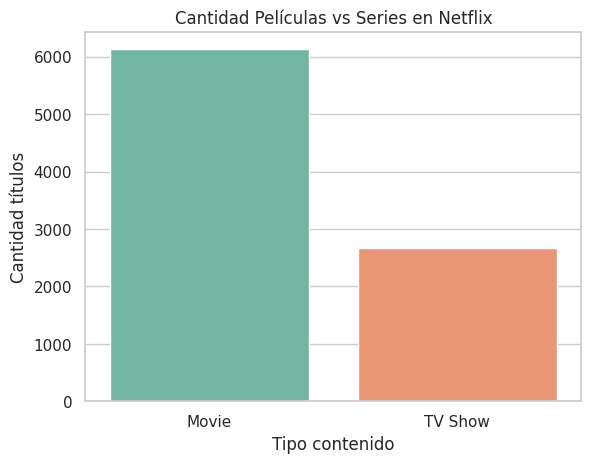

      type  count
0    Movie   6131
1  TV Show   2676


In [4]:
#1
counts_type = df["type"].value_counts().rename_axis("type").reset_index(name="count")
sns.barplot(data=counts_type, x="type", y="count", palette="Set2")
plt.title("Cantidad Películas vs Series en Netflix")
plt.xlabel("Tipo contenido")
plt.ylabel("Cantidad títulos")
plt.show()

print(counts_type)
#El tipo de contenido que predomina en Netflix son las peliculas
#alguna implicancia que podría tener para los ususarios, sería la rapidez del contenido.

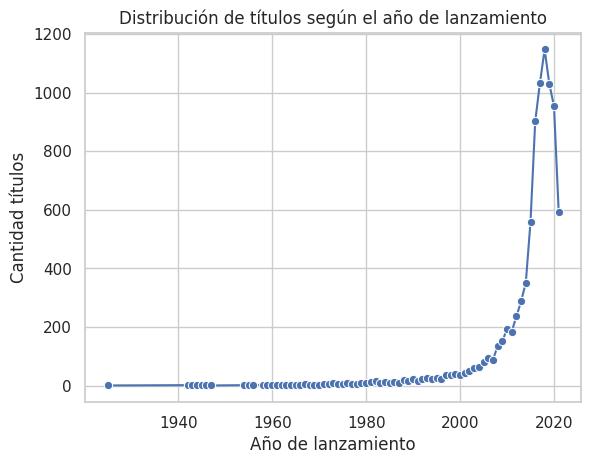

    release_year  count
69          2017   1032
70          2018   1147
71          2019   1030
72          2020    953
73          2021    592


In [6]:
#2
titles_by_year = (
    df.groupby("release_year")["show_id"]
      .count()
      .reset_index(name="count")
      .sort_values("release_year")
)

sns.lineplot(data=titles_by_year, x="release_year", y="count", marker="o")
plt.title("Distribución de títulos según el año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad títulos")
plt.show()

print(titles_by_year.tail())

#hay más contenido reciente, en los 2000 aumentó significativamente los lanzamientos, parece que empieza a disminuir este comportamiento en esta década.

/tmp/ipython-input-4107054793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratings_count, x="rating", y="count", palette="viridis")


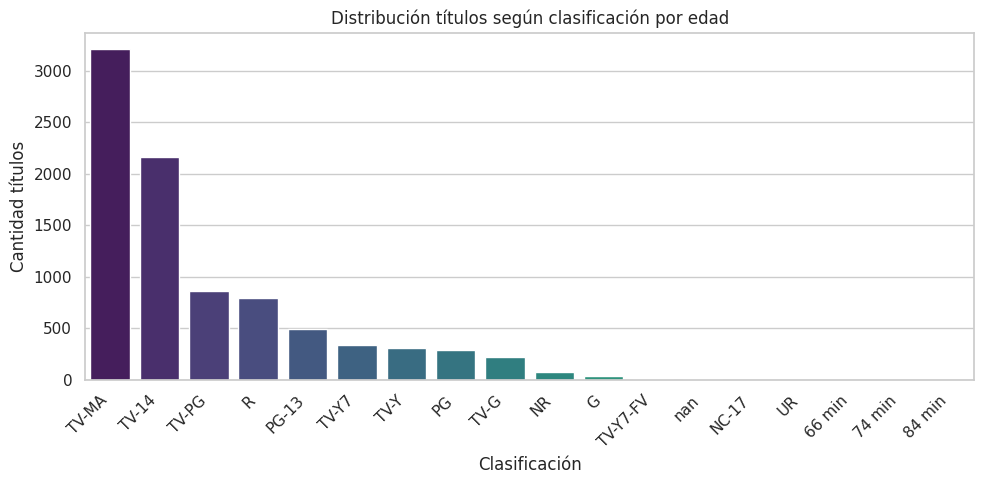

  rating  count
0  TV-MA   3207
1  TV-14   2160
2  TV-PG    863
3      R    799
4  PG-13    490
5  TV-Y7    334
6   TV-Y    307
7     PG    287
8   TV-G    220
9     NR     80


In [9]:
# 1.3 Distribución de clasificaciones por edad


df["rating"] = df["rating"].astype(str).str.strip()

#
ratings_count = (
    df["rating"].value_counts(dropna=True)
      .reset_index()
)
ratings_count.columns = ["rating", "count"]  # renombrar columnas

#Gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(data=ratings_count, x="rating", y="count", palette="viridis")
plt.title("Distribución títulos según clasificación por edad")
plt.xlabel("Clasificación")
plt.ylabel("Cantidad títulos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(ratings_count.head(10))

#La clasificación TV_MA es la más común, Netflix está más enfocado en el público adulto.





## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


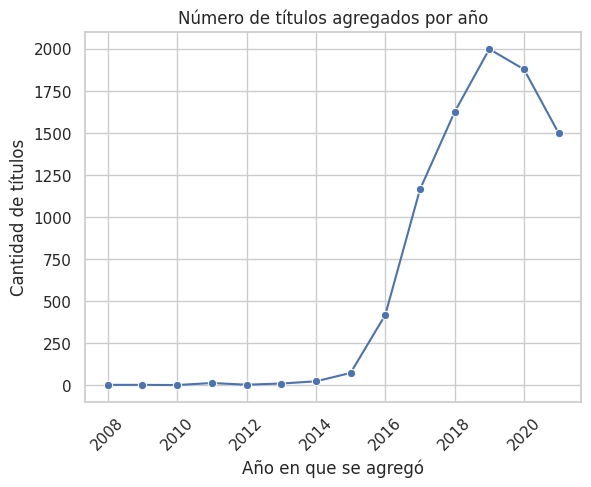

    year_added  count
9       2017.0   1164
10      2018.0   1625
11      2019.0   1999
12      2020.0   1878
13      2021.0   1498


In [11]:
#2.4


df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")


df["year_added"] = df["date_added"].dt.year


titles_added_per_year = (
    df.groupby("year_added")["show_id"]
      .count()
      .reset_index(name="count")
      .sort_values("year_added")
)

# Gráfico
sns.lineplot(data=titles_added_per_year, x="year_added", y="count", marker="o")
plt.title("Número de títulos agregados por año")
plt.xlabel("Año en que se agregó")
plt.ylabel("Cantidad títulos")
plt.xticks(rotation=45)
plt.show()

print(titles_added_per_year.tail())

#desde el año 2015 al 2019 que el catálogo creció casi exponencialmente, lo cuál coincide con su expansión internacional pues adquirieron más títulos y aumentaron sus propias producciones.

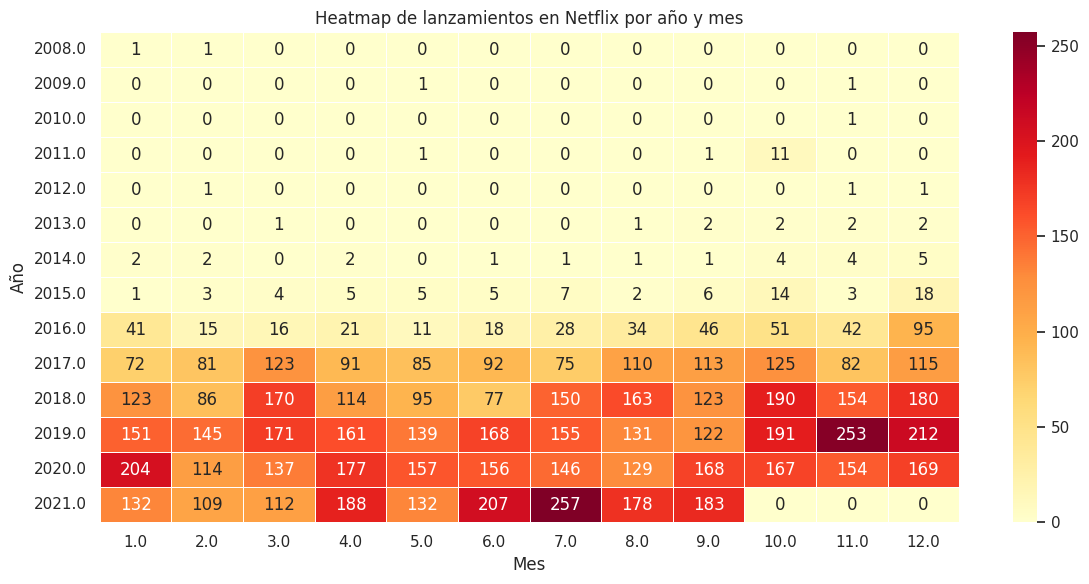

In [17]:
#2.5


df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month


heatmap_data = (
    df.pivot_table(
        index="year_added",
        columns="month_added",
        values="show_id",
        aggfunc="count"
    )
    .fillna(0)
    .astype(int)
)


plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    annot=True,
    fmt="d",
    linewidths=0.5,
    cbar=True
)
plt.title("Heatmap de lanzamientos en Netflix por año y mes")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.tight_layout()
plt.show()


#Sí hay meses con más estrenos que otros, los cuáles son enero, y de julio a diciembre, lo cuál coincide con las vacaciones de los consumidores.

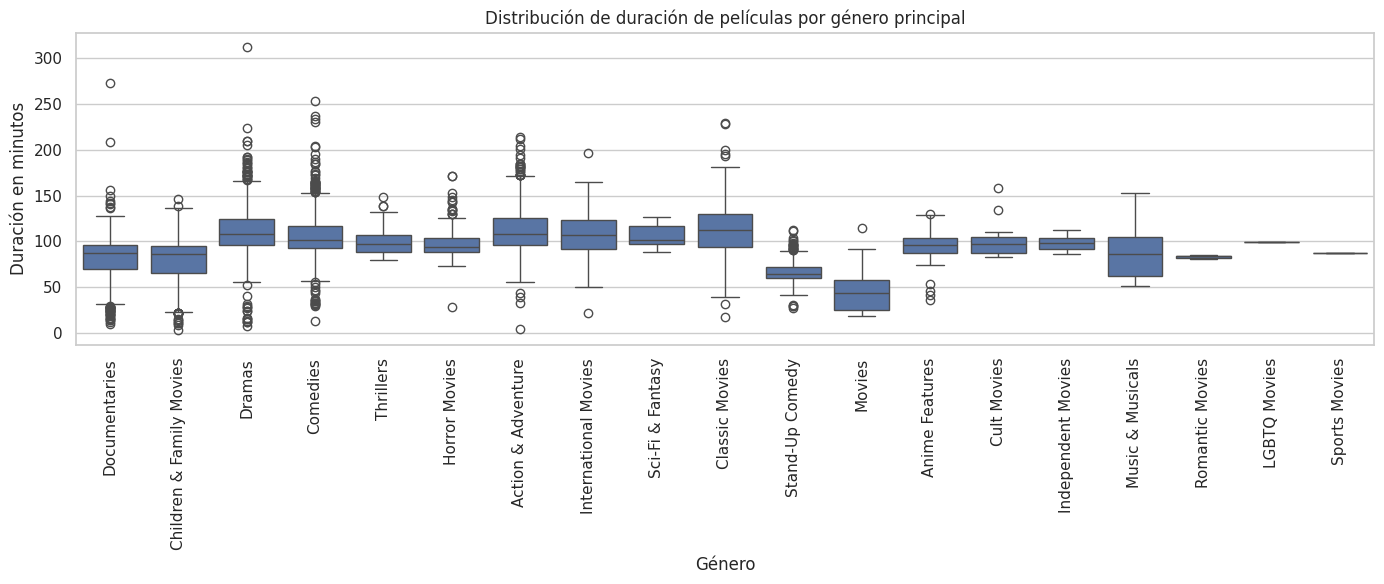

In [31]:
# 2.6

movies = df.query("type == 'Movie'").copy()


movies["duration_min"] = (
    movies["duration"]
    .str.extract(r"(\d+)")
    .astype(float)
)


movies["main_genre"] = (
    movies["listed_in"]
    .astype(str)
    .str.split(",")
    .str[0]
    .str.strip()
)


movies_clean = movies.dropna(subset=["duration_min", "main_genre"])

#Gráfico violinplot
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=movies_clean,
    x="main_genre",
    y="duration_min",
)
plt.xticks(rotation=90)
plt.title("Distribución de duración de películas por género principal")
plt.xlabel("Género")
plt.ylabel("Duración en minutos")
plt.tight_layout()
plt.show()

#Se observa que géneros como Documentales y Dramas tienden a tener mayor duración
#La variabilidad dentro de un mismo género es amplia, no hay una duración estándar.




## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



/tmp/ipython-input-3220327809.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


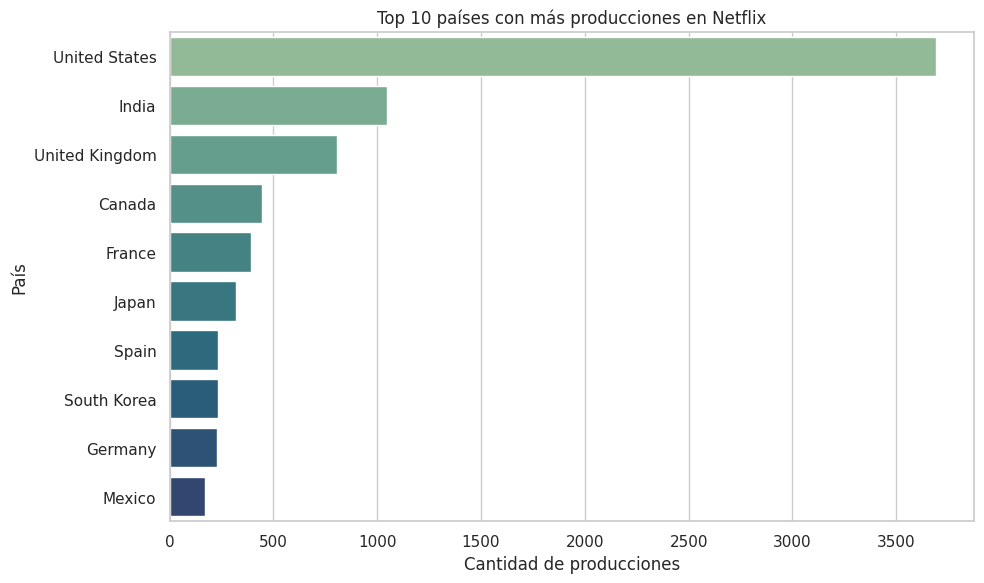

In [39]:
#3.7

countries = (
    df["country"]
    .dropna()
    .astype(str)
    .str.split(",")
    .explode()
    .str.strip()
)


countries = countries.dropna()
countries = countries[countries.str.lower() != "nan"]

top_countries = (
    countries.groupby(countries)
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

#Gráfico
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_countries,
    x="count",
    y="country",
    palette="crest"
)
plt.title("Top 10 países con más producciones en Netflix")
plt.xlabel("Cantidad de producciones")
plt.ylabel("País")
plt.tight_layout()
plt.show()

#Estados Unidos, India y Reino Unido dominan el catálogo. Lo que no sorprende, es lo esperado.

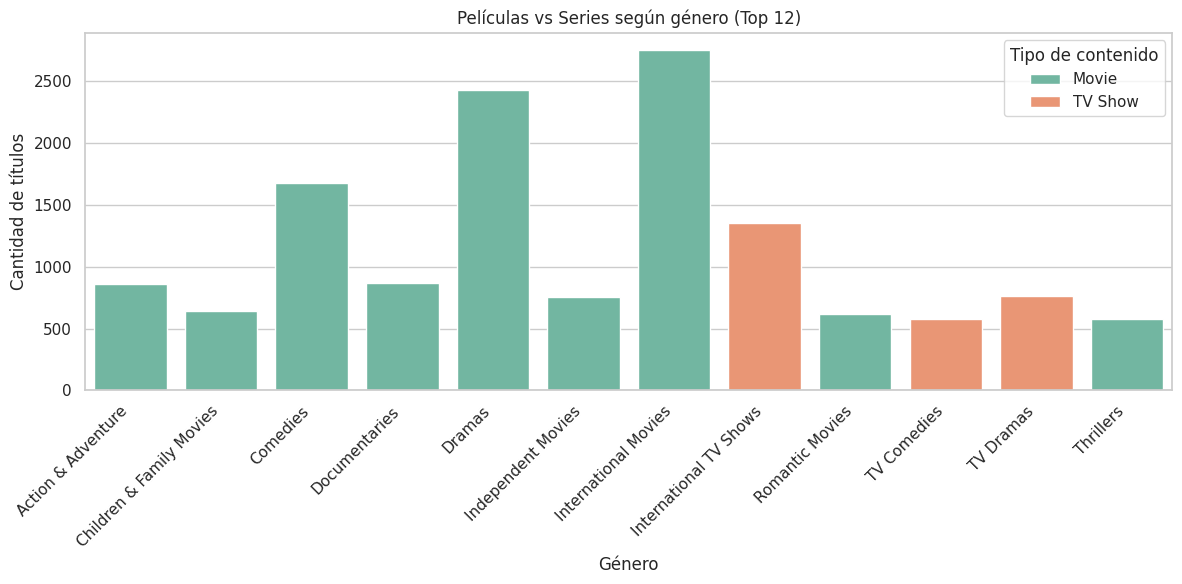

In [42]:
#3.8

df_genres = (
    df["listed_in"]
    .dropna()
    .astype(str)
    .str.split(",")
    .explode()
    .str.strip()
    .reset_index()
    .merge(df[["show_id", "type"]], left_on="index", right_index=True)
)


genre_type_counts = (
    df_genres.groupby(["listed_in", "type"])["show_id"]
    .count()
    .reset_index(name="count")
)


top_genres = (
    genre_type_counts.groupby("listed_in")["count"]
    .sum()
    .nlargest(12)
    .index
)


genre_top = genre_type_counts[genre_type_counts["listed_in"].isin(top_genres)]


plt.figure(figsize=(12,6))
sns.barplot(
    data=genre_top,
    x="listed_in",
    y="count",
    hue="type",
    palette="Set2"
)
plt.title("Películas vs Series según género (Top 12)")
plt.xlabel("Género")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de contenido")
plt.tight_layout()
plt.show()

#Si existe relacion genero-tipo. por ejemplo los generos de Dramas y Comedias están más relacionados con las películas, y otros a series.


/tmp/ipython-input-3890877520.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean["decade"] = (movies_clean["release_year"] // 10) * 10
/tmp/ipython-input-3890877520.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


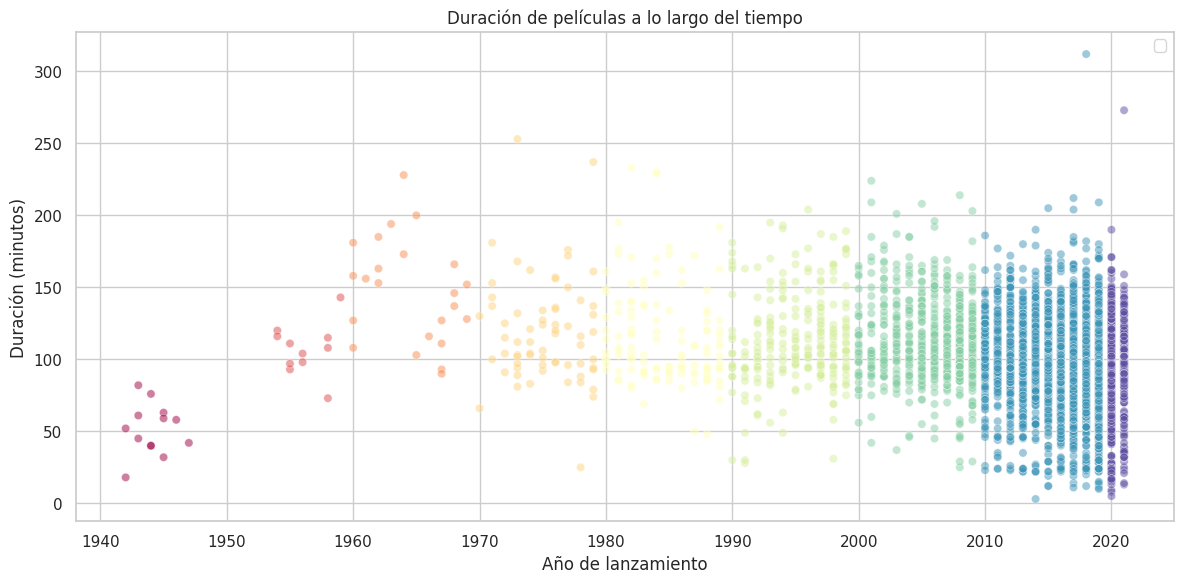

In [47]:
# 3.9


movies = df.query("type == 'Movie'").copy()


movies["duration_min"] = (
    movies["duration"]
    .str.extract(r"(\d+)")
    .astype(float)
)


movies_clean = movies.dropna(subset=["duration_min", "release_year"])


movies_clean["decade"] = (movies_clean["release_year"] // 10) * 10

#Gráfico
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=movies_clean,
    x="release_year",
    y="duration_min",
    hue="decade",
    palette="Spectral",
    alpha=0.5,
    legend=False
)

plt.title("Duración de películas a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (minutos)")
plt.legend()
plt.tight_layout()
plt.show()


#Lois estandares se han mantenido. Se ve outliers, pero no  claro